In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

In [19]:
df_neg_pi_mc = pd.read_parquet("k0s/pp/neg_pi_eff_df_mc.parquet", engine="pyarrow") 
df_pos_pi_mc = pd.read_parquet("k0s/pp/pos_pi_eff_df_mc.parquet", engine="pyarrow") 
df_neg_pi = pd.read_parquet("k0s/pp/neg_pi_eff_df.parquet", engine="pyarrow") 
df_pos_pi = pd.read_parquet("k0s/pp/pos_pi_eff_df.parquet", engine="pyarrow") 

In [20]:
df_neg_pi_mc

,fOccupancyFt0c,fPt,fNSigmaTpcPosPi,fNSigmaTpcPosPi_unc,fNSigmaTpcNegPi,fNSigmaTpcNegPi_unc,fNSigmaTofPosPi,fNSigmaTofPosPi_unc,fNSigmaTofNegPi,fNSigmaTofNegPi_unc
0,"[0, 5000)","[0.2, 0.3)","[0.8785046728971962, 0.8746564046179219, 0.869...","[0.005416521581781118, 0.005489571764035302, 0...","[1.0, 1.0, 1.0]","[0.0, 0.0, 0.0]","[0.9964266080263882, 0.9590434304562947, 0.689...","[0.0009893082699822062, 0.003285863943739395, ...","[0.9972512369433755, 0.9540956569543705, 0.675...","[0.0008680397178122538, 0.0034696965983578507,..."
1,"[0, 5000)","[0.3, 0.4)","[0.8592669432918395, 0.8520055325034578, 0.842...","[0.004572439526746092, 0.004669063769231204, 0...","[0.9671507607192255, 0.9655947441217151, 0.963...","[0.0023436653814858026, 0.0023966008030333386,...","[0.9977524204702628, 0.9552213001383126, 0.691...","[0.0006226654762362022, 0.0027194031532210006,...","[0.997060857538036, 0.9540110650069157, 0.6836...","[0.0007117984041220543, 0.0027541604656508884,..."
2,"[0, 5000)","[0.4, 0.5)","[0.8393574297188755, 0.831004016064257, 0.8213...","[0.004654082888525819, 0.00474974260726139, 0....","[0.824578313253012, 0.815582329317269, 0.80289...","[0.004820453720014325, 0.004915475005096945, 0...","[0.9983935742971888, 0.9583935742971887, 0.680...","[0.0005075882180271038, 0.0025309436322379637,...","[0.9977510040160642, 0.9542168674698795, 0.680...","[0.0006003931778694147, 0.002649150422452281, ..."
3,"[0, 5000)","[0.5, 0.6)","[0.8333974605617546, 0.8241631396691035, 0.812...","[0.0051683124049196885, 0.005280115421917455, ...","[0.7699115044247787, 0.7575990765679107, 0.745...","[0.005837806815458344, 0.005943861972036701, 0...","[0.9961523662947287, 0.9582531742978069, 0.692...","[0.0008587002871634317, 0.002774174178254412, ...","[0.9971142747210465, 0.9544055405925356, 0.675...","[0.000744015222377119, 0.0028933726623737196, ..."
4,"[0, 5000)","[0.6, 0.7)","[0.820506454816286, 0.8123138033763655, 0.7989...","[0.006046731544288464, 0.006152241181412457, 0...","[0.7408142999006951, 0.727656405163853, 0.7132...","[0.006904233423535725, 0.007014181994615819, 0...","[0.996772591857001, 0.951837140019861, 0.68123...","[0.00089367633579905, 0.0033735933071509616, 0...","[0.996772591857001, 0.9515888778550149, 0.6891...","[0.00089367633579905, 0.003381835840757984, 0...."
5,"[0, 5000)","[0.7, 1.0)","[0.7901416765053129, 0.7802538370720189, 0.769...","[0.004946851639025679, 0.00503027708433839, 0....","[0.7595926800472255, 0.7489669421487604, 0.735...","[0.005191316773655415, 0.005267567192347869, 0...","[0.996900826446281, 0.9573494687131051, 0.6939...","[0.0006752463231742134, 0.00245476981501782, 0...","[0.9970484061393152, 0.9563164108618654, 0.679...","[0.0006590217109180735, 0.0024829802348858357,..."
6,"[0, 5000)","[1.0, 1.5)","[0.7629804450438301, 0.7545515846257586, 0.744...","[0.0078084209761283595, 0.007902036123920693, ...","[0.7231962238705327, 0.7107215104517869, 0.700...","[0.008215396086353719, 0.00832572816667507, 0....","[0.9973027646662171, 0.9554956169925826, 0.680...","[0.0009523297647852006, 0.0037864320586148887,...","[0.99527983816588, 0.9558327714093054, 0.67835...","[0.0012585355116079735, 0.0037727276884008823,..."
7,"[0, 6000)","[0.2, 0.3)","[0.8838900086380651, 0.8790670889720703, 0.872...","[0.0027180129488549136, 0.0027663101912924807,...","[1.0, 1.0, 1.0]","[0.0, 0.0, 0.0]","[0.9971206449755254, 0.9563057875035992, 0.687...","[0.0004546100947632998, 0.0017343149307197283,...","[0.9970486610999136, 0.9545061906133027, 0.678...","[0.00046024102797157597, 0.0017680035765157347..."
8,"[0, 6000)","[0.3, 0.4)","[0.8595433385058745, 0.8530702726668145, 0.843...","[0.0023135753287637597, 0.0023573595364292333,...","[0.9666592773221016, 0.9649745067612503, 0.962...","[0.001195371233976716, 0.0012241330803329424, ...","[0.997738860563068, 0.9561959654178674, 0.6878...","[0.0003162646852850381, 0.00136272773278705, 0...","[0.9971624916869873, 0.9543781866548438, 0.685...","[0.00035418496581029595, 0.001389393

In [21]:
def convert_to_interval(interval_str):
    match = re.match(r"(\[|\()(\d+(\.\d+)?),\s*(\d+(\.\d+)?)(\]|\))", interval_str)
    if match:
        # Extract the left and right bounds, converting them to float
        left = float(match.group(2))  # Group 2 captures the left bound
        right = float(match.group(4))  # Group 4 captures the right bound
        
        # Determine if the interval is closed on the left or right
        closed = 'left' if match.group(1) == '[' else 'right'
        # Return the interval as a pandas Interval
        return pd.Interval(left, right, closed=closed)
    
    # If the string doesn't match the interval format, return None
    return None  

def sort_df_by_interval(df, col):
    # Use .loc[] to safely modify the DataFrame and avoid the SettingWithCopyWarning
    df.loc[:, "lower_bound"] = df[col].apply(lambda x: x.left)  # Extract left bound
    df_sorted = df.sort_values("lower_bound").drop(columns="lower_bound")  # Sort and drop helper column
    return df_sorted

In [22]:
interval_cols = ['fPt']

for col in interval_cols:
    df_neg_pi_mc[col] = df_neg_pi_mc[col].apply(convert_to_interval) 
    df_pos_pi_mc[col] = df_pos_pi_mc[col].apply(convert_to_interval) 
    df_neg_pi[col] = df_neg_pi[col].apply(convert_to_interval) 
    df_pos_pi[col] = df_pos_pi[col].apply(convert_to_interval)

In [23]:
def draw_efficiencies(df_data, df_mc, diff_col_name, eff_var):
    
    sort_df_data = sort_df_by_interval(df_data, diff_col_name)
    sort_df_mc = sort_df_by_interval(df_mc, diff_col_name)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

    lower_bin_bounds = sort_df_data[diff_col_name].apply(lambda x: x.left)
    upper_bin_bounds = sort_df_data[diff_col_name].apply(lambda x: x.right)

    bin_centers = (np.array(lower_bin_bounds) + np.array(upper_bin_bounds)) / 2
    bin_widths = (np.array(upper_bin_bounds) - np.array(lower_bin_bounds)) / 2
    
    n_sigma_vals = [3,2,1]
    for icase, n_sigma in enumerate(n_sigma_vals):
        n_sigma_effs_data = []
        n_sigma_effs_uncs_data = []
        n_sigma_effs_mc = []
        n_sigma_effs_uncs_mc = []
        for entry in range(len(sort_df_data)):
            n_sigma_effs_data.append(sort_df_data.loc[entry, eff_var][icase])
            n_sigma_effs_uncs_data.append(sort_df_data.loc[entry, f"{eff_var}_unc"][icase])
            n_sigma_effs_mc.append(sort_df_mc.loc[entry, eff_var][icase])
            n_sigma_effs_uncs_mc.append(sort_df_mc.loc[entry, f"{eff_var}_unc"][icase])
        
        ax1.errorbar(bin_centers, n_sigma_effs_data, yerr=n_sigma_effs_uncs_data, 
                    xerr=bin_widths, label=f'data, |{eff_var}| < {n_sigma}', fmt='o')
        ax1.errorbar(bin_centers, n_sigma_effs_mc, yerr=n_sigma_effs_uncs_mc, 
                    xerr=bin_widths, label=f'mc, |{eff_var}| < {n_sigma}', fmt='o')

        ratio = np.array(n_sigma_effs_data) / np.array(n_sigma_effs_mc)
        ratio_unc = ratio * np.sqrt((np.array(n_sigma_effs_uncs_data) / np.array(n_sigma_effs_data))**2 + (np.array(n_sigma_effs_uncs_mc) / np.array(n_sigma_effs_mc))**2)
        ax2.errorbar(bin_centers, ratio, yerr=ratio_unc, xerr=bin_widths, label=f'|{eff_var}| < {n_sigma}', fmt='o')

    # min_eff = 1
    # max_eff = 0
    # if np.array(effs).flatten()[np.array(effs).flatten()!=0].min() < min_eff:
    #     min_eff = np.array(effs).flatten()[np.array(effs).flatten()!=0].min()
    # if np.array(effs).flatten().max() > max_eff:
    #     max_eff = np.array(effs).flatten().max()

    # min_ratio = 1000
    # max_ratio = 0
    # if ratio[~np.isnan(ratio)].min() < min_ratio:
    #     min_ratio = ratio[~np.isnan(ratio)].min()
    # if ratio[~np.isnan(ratio)].max() > max_ratio:
    #     max_ratio = ratio[~np.isnan(ratio)].max()

    ax1.set_ylabel('Efficiency')
    # ax1.set_ylim(min_eff.min()/2, 1.2)
    ax1.legend()
    ax1.set_yscale('log')
    ax1.grid(True)

    ax2.set_xlabel(r'$p_T$ (GeV/$c$)')
    ax2.set_ylabel('Data / MC')
    # ax2.set_ylim(min_ratio*0.95, max_ratio*1.05)
    ax2.legend()
    ax2.grid(True)

    return fig

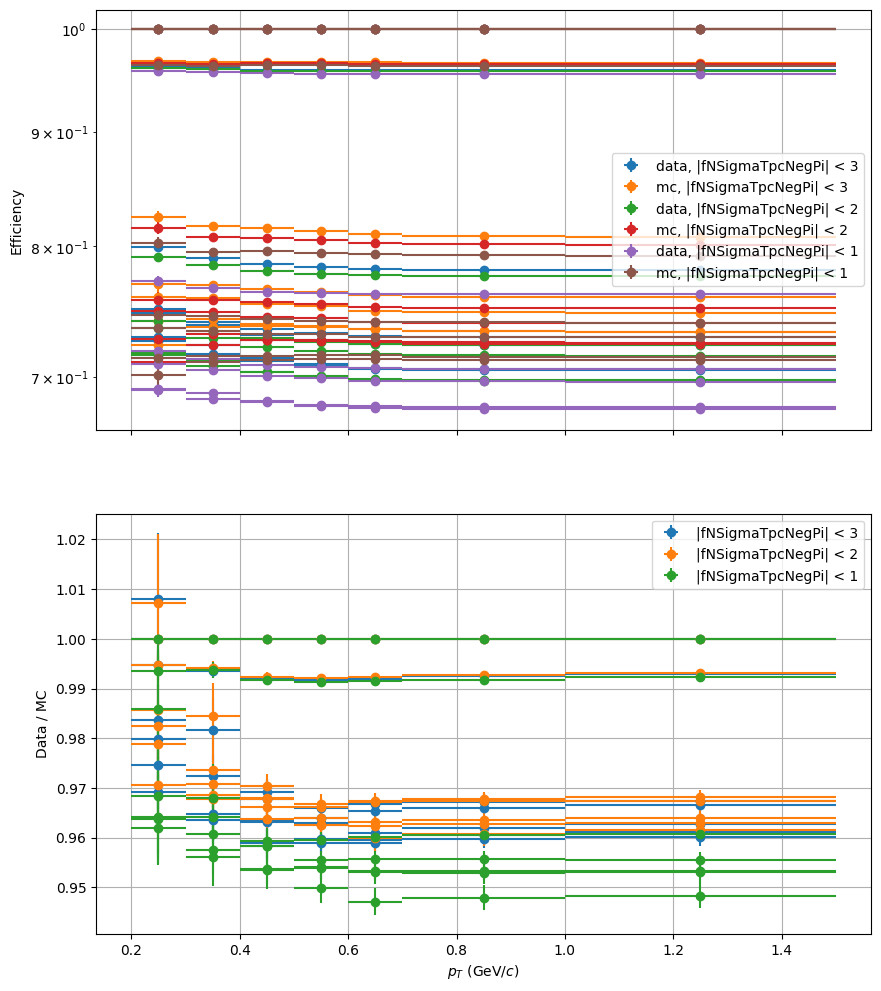

In [24]:
fig_occ_neg_pi = draw_efficiencies(df_neg_pi, df_neg_pi_mc, 'fPt', 'fNSigmaTpcNegPi')

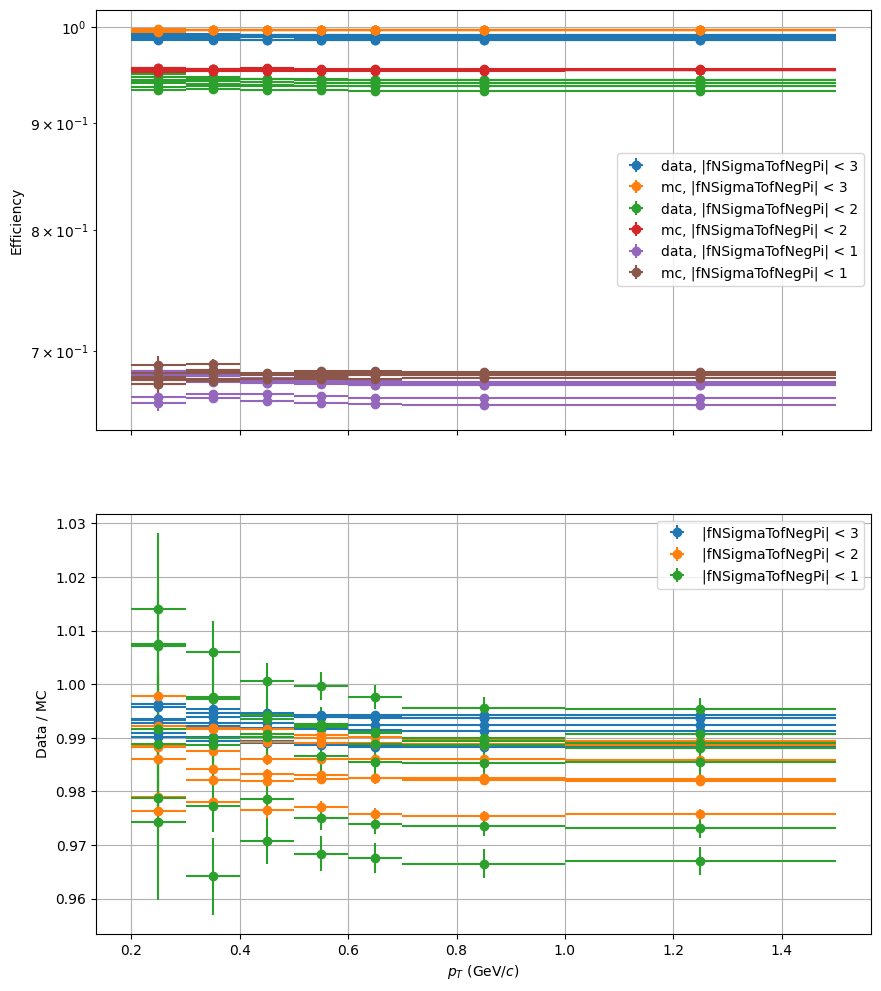

In [25]:
fig_occ_neg_pi = draw_efficiencies(df_neg_pi, df_neg_pi_mc, 'fPt', 'fNSigmaTofNegPi')

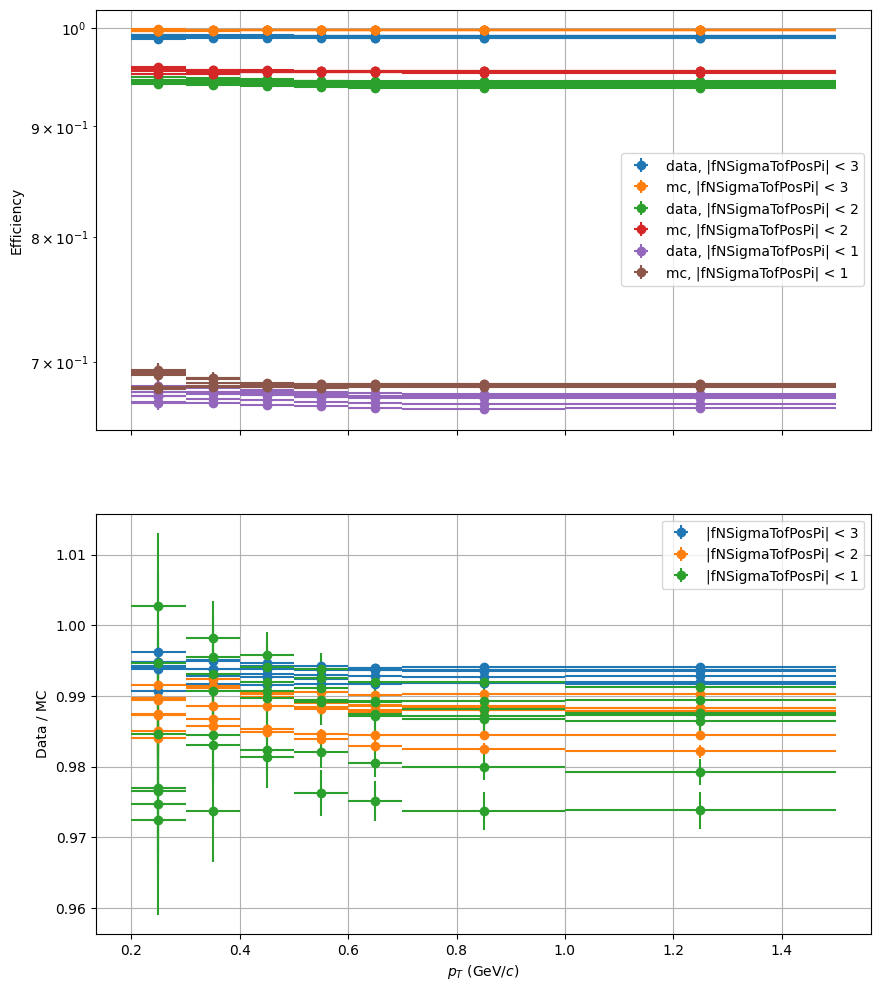

: 

In [ ]:
fig_occ_neg_pi = draw_efficiencies(df_neg_pi, df_neg_pi_mc, 'fPt', 'fNSigmaTofPosPi')